<a href="https://colab.research.google.com/github/rahmani3101/Machine-Learning-/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Experiment 3: Support Vector Machine (SVM) Classifier

## Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions

## Step 1: Load the Dataset

In [3]:
data = {
    'Hours': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7],
    'Scores': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85],
    'Result': ['Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass']
}

In [6]:
df = pd.DataFrame(data)
df.to_csv("student_result.csv", index=False)

In [7]:
# Load dataset
dataset = pd.read_csv("student_result.csv")
print("First 5 rows of dataset:\n", dataset.head())

First 5 rows of dataset:
    Hours  Scores Result
0    2.5      21   Fail
1    5.1      47   Pass
2    3.2      27   Fail
3    8.5      75   Pass
4    3.5      30   Fail


## Step 2: Explore and Visualize

In [8]:
dataset['Result'] = dataset['Result'].map({'Pass': 1, 'Fail': 0})

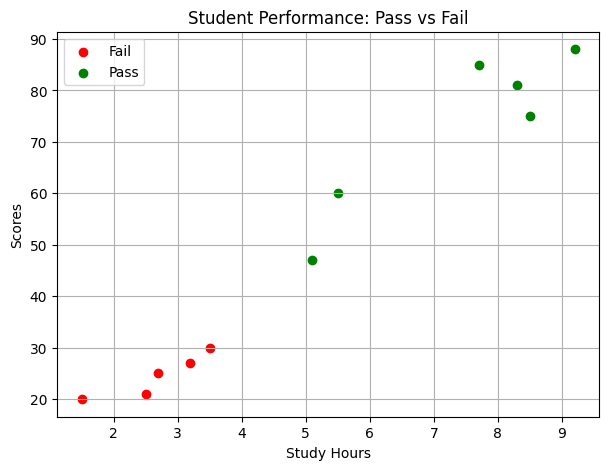

In [10]:
# Scatter plot of Pass vs Fail
plt.figure(figsize=(7, 5))
for label, color in zip([0, 1], ['red', 'green']):
    subset = dataset[dataset['Result'] == label]
    plt.scatter(subset['Hours'], subset['Scores'], label=('Fail' if label == 0 else 'Pass'), color=color)
plt.title('Student Performance: Pass vs Fail')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)
plt.show()

## Step 3: Split Data into Train and Test Sets

In [11]:
X = dataset[['Hours', 'Scores']]
y = dataset['Result']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 4: Train SVM Classifier

In [14]:
# Try both linear and RBF kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)

In [15]:
svm_linear.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

SVC(random_state=42)

## Step 5: Predict Test Set Results

In [16]:
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

## Step 6: Evaluate Model Performance

In [17]:
print("\n=== Linear Kernel SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

print("\n=== RBF Kernel SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))



=== Linear Kernel SVM ===
Accuracy: 1.0
Confusion Matrix:
 [[3 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


=== RBF Kernel SVM ===
Accuracy: 1.0
Confusion Matrix:
 [[3 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## Step 7: Visualize Decision Boundary (for Linear SVM)

/tmp/ipython-input-687295572.py:5: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X_combined, y_combined.astype(np.integer), clf=svm_linear, legend=2)


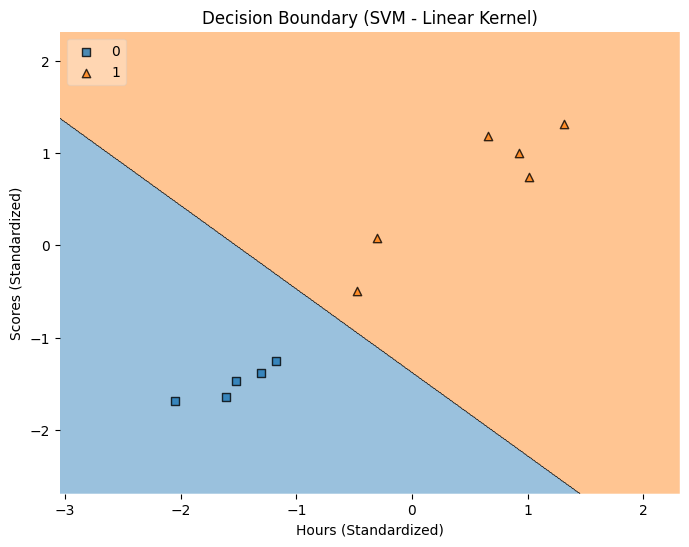

In [18]:
X_combined = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(8, 6))
plot_decision_regions(X_combined, y_combined.astype(np.integer), clf=svm_linear, legend=2)
plt.title('Decision Boundary (SVM - Linear Kernel)')
plt.xlabel('Hours (Standardized)')
plt.ylabel('Scores (Standardized)')
plt.show()

## Step 8: Predict for a New Student (9.25 hrs, 85 score)

In [19]:
new_data = np.array([[9.25, 85]])
new_data_scaled = scaler.transform(new_data)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
pred_linear = svm_linear.predict(new_data_scaled)[0]
pred_rbf = svm_rbf.predict(new_data_scaled)[0]

In [22]:
print(f"\nPrediction for a student with 9.25 hrs and score 85:")
print("Linear Kernel ->", "Pass" if pred_linear == 1 else "Fail")
print("RBF Kernel ->", "Pass" if pred_rbf == 1 else "Fail")


Prediction for a student with 9.25 hrs and score 85:
Linear Kernel -> Pass
RBF Kernel -> Pass
